In [1]:
%cd ~/SSMuLA

/disk2/fli/SSMuLA


In [2]:
%load_ext autoreload
%autoreload 2
%load_ext blackcellmagic

In [3]:
import pandas as pd
import numpy as np

In [4]:
lib_stat = pd.read_csv("results/fitness_distribution/max/all_lib_stats.csv", index_col=0)
lib_stat

,lib,n_mut_cuttoff,lib_basic_dict,fit_basic_dict,cauchy,kde
0,DHFR,0,"{'n_site': 3, 'numb_measured': 8000, 'percent_...","{'mean': 0.15794490868184022, 'std': 0.1275673...","{'loc': 0.12713224210063334, 'scale': 0.001737...","{'peaks': [0.1275662158236592, 0.5084256342965..."
1,DHFR,1,"{'n_site': 3, 'numb_measured': 58, 'percent_me...","{'mean': 0.265664243587611, 'std': 0.279157674...","{'loc': 0.26544618245704277, 'scale': 0.083840...","{'peaks': [0.14398807743504038, 0.299573191252..."
2,DHFR,2,"{'n_site': 3, 'numb_measured': 1141, 'percent_...","{'mean': 0.25650460769733785, 'std': 0.1310729...","{'loc': 0.12787730504263345, 'scale': 0.005662...","{'peaks': [0.1315730494255245, 0.4899688201977..."
3,GB1,0,"{'n_site': 4, 'numb_measured': 149361, 'percen...","{'mean': 0.009188541513633722, 'std': 0.000386...","{'loc': 0.0002933800386363465, 'scale': 0.0002...","{'peaks': [0.001001001001001001, 0.15015015015..."
4,GB1,1,"{'n_site': 4, 'numb_measured': 77, 'percent_me...","{'mean': 0.0736296883010567, 'std': 0.01418649...","{'loc': 0.005832242022806541, 'scale': 0.01475...","{'peaks': [0.01196928449026897, 0.422560648002..."
5,GB1,2,"{'n_site': 4, 'numb_measured': 2168, 'percent_...","{'mean': 0.035159396666492766, 'std': 0.002241...","{'loc': 0.0009651816727329432, 'scale': 0.0020...","{'peaks': [0.0036951493624763202, 0.2709776199..."
6,TrpB3A,0,"{'n_site': 3, 'numb_measured': 7971, 'percent_...","{'mean': -0.03923114233002105, 'std': -0.03975...","{'loc': -0.03994396615879374, 'scale': 0.02442...","{'peaks': [-0.3944951616078841, -0.31702320818..."
7,TrpB3A,1,"{'n_site': 3, 'numb_measured': 57, 'percent_me...","{'mean': 0.06193767662823346, 'std': 0.0136003...","{'loc': 0.004323182695186965, 'scale': 0.02989...","{'peaks': [0.007094147970803655, 0.92094698630..."
8,TrpB3A,2,"{'n_site': 3, 'numb_measured': 1137, 'percent_...","{'mean': -0.019419151829035922, 'std': -0.0216...","{'loc': -0.021119835332288128, 'scale': 0.0240...","{'peaks': [-0.02136493695996955, 0.27745545481..."
9,TrpB3B,0,"{'n_site': 3, 'numb_measured': 7996, 'percent_...","{'mean': -0.055223294654549754, 'std': -0.0555...","{'loc': -0.055374165544969954, 'scale': 0.0179...","{'peaks': [-0.3315353103440577, -0.25764490240..."


In [17]:
de_df = pd.read_csv("results/simulations/DE-active/scale2max/all_landscape_de_summary.csv")
de_df

,lib,de_type,mean_all,median_all,mean_top96,median_top96,mean_top384,median_top384,fraction_max
0,DHFR,single_step_DE,0.889922,0.857847,1.000000,1.000000,1.000000,1.000000,0.283568
1,DHFR,recomb_SSM,0.851463,0.847249,0.999315,1.000000,0.949198,0.959943,0.090164
2,DHFR,top96_SSM,0.959305,1.000000,1.000000,1.000000,1.000000,1.000000,0.632319
3,GB1,single_step_DE,0.571523,0.597319,1.000000,1.000000,1.000000,1.000000,0.026045
4,GB1,recomb_SSM,0.362927,0.370170,0.978695,1.000000,0.887291,0.862211,0.002055
5,GB1,top96_SSM,0.611348,0.620935,1.000000,1.000000,1.000000,1.000000,0.025040
6,TrpB3A,single_step_DE,0.401312,0.200246,0.993309,1.000000,NaN,NaN,0.254237
7,TrpB3A,recomb_SSM,0.401256,0.190336,NaN,NaN,NaN,NaN,0.220339
8,TrpB3A,top96_SSM,0.428916,0.230815,NaN,NaN,NaN,NaN,0.288136
9,TrpB3B,single_step_DE,0.271319,0.127970,0.294215,0.127970,NaN,NaN,0.166667


In [18]:
# clean up the nan if not full N
# Fill NaNs in 'mean_top96' and 'median_top96' from 'mean_all' and 'median_all'
de_df["mean_top96"] = de_df["mean_top96"].fillna(de_df["mean_all"])
de_df["median_top96"] = de_df["median_top96"].fillna(de_df["median_all"])

# Fill NaNs in 'mean_top384' and 'median_top384' from 'mean_top96' and 'median_top96'
de_df["mean_top384"] = de_df["mean_top384"].fillna(de_df["mean_top96"])
de_df["median_top384"] = de_df["median_top384"].fillna(de_df["median_top96"])


In [6]:
mlde_df = pd.read_csv("results/mlde/vis/all_df.csv")
mlde_df

,encoding,model,n_sample,ft_lib,rep,maxes_all,means_all,maxes,means,ndcgs,rhos,if_truemaxs,truemax_inds,n_mut_cutoff,lib,zs,n_top
0,esm2_t33_650M_UR50D-flatten_site,boosting,384,4000,0,0.840951,0.156936,1.000000,0.499483,0.930975,0.498705,1.0,267.0,all,DHFR,Triad_score,384
1,esm2_t33_650M_UR50D-flatten_site,boosting,384,4000,1,0.837710,0.159552,0.996537,0.500002,0.932816,0.480707,0.0,NaN,all,DHFR,Triad_score,384
2,esm2_t33_650M_UR50D-flatten_site,boosting,384,4000,2,0.841871,0.158632,0.996537,0.464790,0.901309,0.464723,0.0,NaN,all,DHFR,Triad_score,384
3,esm2_t33_650M_UR50D-flatten_site,boosting,384,4000,3,0.812338,0.180189,1.000000,0.474807,0.926957,0.420841,1.0,2.0,all,DHFR,Triad_score,384
4,esm2_t33_650M_UR50D-flatten_site,boosting,384,4000,4,0.841787,0.162283,1.000000,0.485674,0.923643,0.430931,1.0,274.0,all,DHFR,Triad_score,384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245995,one-hot,ridge,384,77,95,0.771698,0.017581,0.749107,0.330329,0.979702,0.190245,0.0,NaN,single,TrpB4,none,96
245996,one-hot,ridge,384,77,96,0.597178,0.060315,0.749107,0.361424,0.980491,0.190741,0.0,NaN,single,TrpB4,none,96
245997,one-hot,ridge,384,77,97,0.634966,0.009730,0.752895,0.428029,0.981345,0.193477,0.0,NaN,single,TrpB4,none,96
245998,one-hot,ridge,384,77,98,0.783760,0.040222,0.749107,0.284615,0.979312,0.188739,0.0,NaN,single,TrpB4,none,96


In [7]:
mlde_df[
    (mlde_df["zs"] == "none")
    & (mlde_df["encoding"] == "one-hot")
    & (mlde_df["model"] == "boosting")
    & (mlde_df["n_mut_cutoff"] == "all")
    & (mlde_df["n_top"] == 96)
]

,encoding,model,n_sample,ft_lib,rep,maxes_all,means_all,maxes,means,ndcgs,rhos,if_truemaxs,truemax_inds,n_mut_cutoff,lib,zs,n_top
210800,one-hot,boosting,384,8000,0,0.998287,0.155545,1.000000,0.551468,0.931935,0.485444,1.0,0.0,all,DHFR,none,96
210801,one-hot,boosting,384,8000,1,0.829062,0.157209,1.000000,0.626697,0.945184,0.486228,1.0,78.0,all,DHFR,none,96
210802,one-hot,boosting,384,8000,2,0.964821,0.164878,1.000000,0.647137,0.956728,0.482920,1.0,4.0,all,DHFR,none,96
210803,one-hot,boosting,384,8000,3,0.936785,0.154625,1.000000,0.672220,0.964112,0.475982,1.0,7.0,all,DHFR,none,96
210804,one-hot,boosting,384,8000,4,0.979447,0.154048,1.000000,0.679334,0.960879,0.497635,1.0,7.0,all,DHFR,none,96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221895,one-hot,boosting,384,159129,95,0.424082,0.017496,0.640630,0.274401,0.980378,0.232898,0.0,NaN,all,TrpB4,none,96
221896,one-hot,boosting,384,159129,96,0.341062,0.015333,0.655536,0.210972,0.975896,0.194796,0.0,NaN,all,TrpB4,none,96
221897,one-hot,boosting,384,159129,97,0.508165,0.015933,1.000000,0.358148,0.980344,0.214661,1.0,93.0,all,TrpB4,none,96
221898,one-hot,boosting,384,159129,98,0.401224,0.019547,0.735563,0.330487,0.979452,0.210808,0.0,NaN,all,TrpB4,none,96


In [9]:
mlde_avg = mlde_df[
    (mlde_df["zs"] == "none")
    & (mlde_df["encoding"] == "one-hot")
    & (mlde_df["model"] == "boosting")
    & (mlde_df["n_mut_cutoff"] == "all")
    & (mlde_df["n_top"] == 96)
][["lib", "maxes", "means", "ndcgs", "rhos", "if_truemaxs"]].groupby("lib").mean()
mlde_avg

,maxes,means,ndcgs,rhos,if_truemaxs
lib,,,,,
DHFR,0.961683,0.602670,0.940110,0.490817,0.54
GB1,0.676405,0.180360,0.780896,0.455742,0.04
TrpB3A,0.545842,0.010313,0.987780,0.433589,0.30
TrpB3B,0.320358,-0.033105,0.986987,0.244875,0.20
TrpB3C,0.384012,-0.008548,0.985357,0.318002,0.10
TrpB3D,0.938192,0.212361,0.980332,0.360104,0.41
TrpB3E,0.600019,0.040154,0.983239,0.118172,0.42
TrpB3F,0.964013,0.069949,0.985816,0.180791,0.87
TrpB3G,0.877840,0.086610,0.978737,0.186296,0.59


In [12]:
mlde_df[
    (mlde_df["zs"] == "none")
    & (mlde_df["encoding"] == "one-hot")
    & (mlde_df["model"] == "boosting")
    & (mlde_df["n_mut_cutoff"] == "all")
    & (mlde_df["n_top"] == 96)
][["lib", "maxes", "means", "ndcgs", "rhos", "if_truemaxs"]].groupby("lib").mean()["maxes"]

lib
DHFR      0.961683
GB1       0.676405
TrpB3A    0.545842
TrpB3B    0.320358
TrpB3C    0.384012
TrpB3D    0.938192
TrpB3E    0.600019
TrpB3F    0.964013
TrpB3G    0.877840
TrpB3H    0.503986
TrpB3I    0.967592
TrpB4     0.771810
Name: maxes, dtype: float64

In [19]:
import matplotlib.pyplot as plt

In [14]:
from ast import literal_eval

In [15]:
lib_stat_all = lib_stat[lib_stat["n_mut_cuttoff"]== 0]

sliced_lib_basic_df = pd.concat(
        [
            lib_stat_all["lib"],
            lib_stat_all["lib_basic_dict"].apply(literal_eval).apply(pd.Series)
        ],
        axis=1,
    )[["lib", "percent_active", "n_site"]]
sliced_lib_basic_df

,lib,percent_active,n_site
0,DHFR,10.675000,3.0
3,GB1,23.128528,4.0
6,TrpB3A,0.740183,3.0
9,TrpB3B,0.225113,3.0
12,TrpB3C,0.437828,3.0
15,TrpB3D,9.261883,3.0
18,TrpB3E,2.021597,3.0
21,TrpB3F,1.059842,3.0
24,TrpB3G,1.368648,3.0
27,TrpB3H,0.686884,3.0


In [55]:
lib_stat_all.columns

Index(['lib', 'n_mut_cuttoff', 'lib_basic_dict', 'fit_basic_dict', 'cauchy',
       'kde'],
      dtype='object')

In [19]:
sliced_de_df = de_df[de_df["de_type"] == "recomb_SSM"]
sliced_de_df

,lib,de_type,mean_all,median_all,mean_top96,median_top96,mean_top384,median_top384,fraction_max
1,DHFR,recomb_SSM,0.851463,0.847249,0.999315,1.000000,0.949198,0.959943,0.090164
4,GB1,recomb_SSM,0.362927,0.370170,0.978695,1.000000,0.887291,0.862211,0.002055
7,TrpB3A,recomb_SSM,0.401256,0.190336,0.401256,0.190336,0.401256,0.190336,0.220339
10,TrpB3B,recomb_SSM,0.271319,0.127970,0.271319,0.127970,0.271319,0.127970,0.166667
13,TrpB3C,recomb_SSM,0.374458,0.310257,0.374458,0.310257,0.374458,0.310257,0.114286
16,TrpB3D,recomb_SSM,0.647904,0.683433,0.992109,0.986226,0.862228,0.841344,0.057024
19,TrpB3E,recomb_SSM,0.249992,0.074268,0.380886,0.103098,0.380886,0.103098,0.167702
22,TrpB3F,recomb_SSM,0.653587,0.951595,0.653587,0.951595,0.653587,0.951595,0.414634
25,TrpB3G,recomb_SSM,0.586418,0.635331,0.649076,0.704780,0.649076,0.704780,0.203704
28,TrpB3H,recomb_SSM,0.347797,0.074269,0.347797,0.074269,0.347797,0.074269,0.169811


In [20]:
merged_active_de = pd.merge(sliced_lib_basic_df, sliced_de_df, on="lib")
merged_active_de

,lib,percent_active,n_site,de_type,mean_all,median_all,mean_top96,median_top96,mean_top384,median_top384,fraction_max
0,DHFR,10.675000,3.0,recomb_SSM,0.851463,0.847249,0.999315,1.000000,0.949198,0.959943,0.090164
1,GB1,23.128528,4.0,recomb_SSM,0.362927,0.370170,0.978695,1.000000,0.887291,0.862211,0.002055
2,TrpB3A,0.740183,3.0,recomb_SSM,0.401256,0.190336,0.401256,0.190336,0.401256,0.190336,0.220339
3,TrpB3B,0.225113,3.0,recomb_SSM,0.271319,0.127970,0.271319,0.127970,0.271319,0.127970,0.166667
4,TrpB3C,0.437828,3.0,recomb_SSM,0.374458,0.310257,0.374458,0.310257,0.374458,0.310257,0.114286
5,TrpB3D,9.261883,3.0,recomb_SSM,0.647904,0.683433,0.992109,0.986226,0.862228,0.841344,0.057024
6,TrpB3E,2.021597,3.0,recomb_SSM,0.249992,0.074268,0.380886,0.103098,0.380886,0.103098,0.167702
7,TrpB3F,1.059842,3.0,recomb_SSM,0.653587,0.951595,0.653587,0.951595,0.653587,0.951595,0.414634
8,TrpB3G,1.368648,3.0,recomb_SSM,0.586418,0.635331,0.649076,0.704780,0.649076,0.704780,0.203704
9,TrpB3H,0.686884,3.0,recomb_SSM,0.347797,0.074269,0.347797,0.074269,0.347797,0.074269,0.169811


In [21]:
simple_merge = pd.merge(merged_active_de, mlde_avg, on="lib")
simple_merge

,lib,percent_active,n_site,de_type,mean_all,median_all,mean_top96,median_top96,mean_top384,median_top384,fraction_max,maxes,means,ndcgs,rhos,if_truemaxs
0,DHFR,10.675000,3.0,recomb_SSM,0.851463,0.847249,0.999315,1.000000,0.949198,0.959943,0.090164,0.961683,0.602670,0.940110,0.490817,0.54
1,GB1,23.128528,4.0,recomb_SSM,0.362927,0.370170,0.978695,1.000000,0.887291,0.862211,0.002055,0.676405,0.180360,0.780896,0.455742,0.04
2,TrpB3A,0.740183,3.0,recomb_SSM,0.401256,0.190336,0.401256,0.190336,0.401256,0.190336,0.220339,0.545842,0.010313,0.987780,0.433589,0.30
3,TrpB3B,0.225113,3.0,recomb_SSM,0.271319,0.127970,0.271319,0.127970,0.271319,0.127970,0.166667,0.320358,-0.033105,0.986987,0.244875,0.20
4,TrpB3C,0.437828,3.0,recomb_SSM,0.374458,0.310257,0.374458,0.310257,0.374458,0.310257,0.114286,0.384012,-0.008548,0.985357,0.318002,0.10
5,TrpB3D,9.261883,3.0,recomb_SSM,0.647904,0.683433,0.992109,0.986226,0.862228,0.841344,0.057024,0.938192,0.212361,0.980332,0.360104,0.41
6,TrpB3E,2.021597,3.0,recomb_SSM,0.249992,0.074268,0.380886,0.103098,0.380886,0.103098,0.167702,0.600019,0.040154,0.983239,0.118172,0.42
7,TrpB3F,1.059842,3.0,recomb_SSM,0.653587,0.951595,0.653587,0.951595,0.653587,0.951595,0.414634,0.964013,0.069949,0.985816,0.180791,0.87
8,TrpB3G,1.368648,3.0,recomb_SSM,0.586418,0.635331,0.649076,0.704780,0.649076,0.704780,0.203704,0.877840,0.086610,0.978737,0.186296,0.59
9,TrpB3H,0.686884,3.0,recomb_SSM,0.347797,0.074269,0.347797,0.074269,0.347797,0.074269,0.169811,0.503986,0.004490,0.978160,0.082373,0.24


Loading BokehJS ...

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
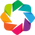

In [22]:

import bokeh
from bokeh.io import show, export_svg, export_png
from bokeh.plotting import show
from bokeh.themes.theme import Theme

bokeh.io.output_notebook()

import holoviews as hv
from holoviews import opts

hv.extension("bokeh", "matplotlib")


In [23]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook

output_notebook()

Loading BokehJS ...

In [24]:
from holoviews import dim

Loading BokehJS ...

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
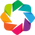

In [25]:
from SSMuLA.vis import LIB_COLORS

In [26]:
# Create a scatter plot
scatter_de = hv.Scatter(simple_merge, "percent_active", ["fraction_max", "lib"]).opts(
    height=400, width=400,  marker='circle', color=dim("lib").categorize(LIB_COLORS),
    alpha=0.8,
    size=10, tools=["hover"], 
    # legend_labels="DE combo fraction max"
)
scatter_mlde = hv.Scatter(simple_merge, "percent_active", ["maxes", "lib"]).opts(
    height=400, width=400,  marker='*', color=dim("lib").categorize(LIB_COLORS),
    size=10, tools=["hover"], 
    # legend_labels="MLDE"
)

# Display the plot
scatter_de * scatter_mlde.opts(legend_position='right', logx=True)

:Overlay
   .Scatter.I  :Scatter   [percent_active]   (fraction_max,lib)
   .Scatter.II :Scatter   [percent_active]   (maxes,lib)

In [68]:
simple_merge.columns

Index(['lib', 'percent_active', 'n_site', 'de_type', 'mean_all', 'median_all',
       'mean_top96', 'median_top96', 'mean_top384', 'median_top384',
       'fraction_max', 'maxes', 'means', 'ndcgs', 'rhos_pearson',
       'rhos_spearman', 'iftruemax', 'delta_topmax', 'norm_delta_topmax'],
      dtype='object')

In [29]:
simple_merge["delta"] = simple_merge["maxes"] - simple_merge["fraction_max"]

# normlize to different options 3- and 4-site landscapes can have
# df['C'] = df.apply(lambda row: custom_function(row['A'], row['B']), axis=1)
# simple_merge["norm_delta_topmax"] = simple_merge.apply(lambda row: row["iftruemax"] * 20**(row["n_site"]-3) - row["fraction_max"], axis=1)
# simple_merge["delta_topmax"], simple_merge["norm_delta_topmax"]

In [31]:
# Create a scatter plot
hv.Scatter(simple_merge, "percent_active", ["delta", "lib"]).opts(
    height=400, width=400,  marker='circle', color=dim("lib").categorize(LIB_COLORS),
    alpha=0.8,
    size=10, tools=["hover"], 
    # legend_labels="DE combo fraction max"
)

:Scatter   [percent_active]   (delta,lib)

In [32]:
# Create a scatter plot
hv.Scatter(simple_merge, "percent_active", ["delta", "lib"]).opts(
    height=400, width=400,  marker='circle', color=dim("lib").categorize(LIB_COLORS),
    alpha=0.8,
    size=10, tools=["hover"], logx=True,
    show_legend=True, 
    legend_position="right",
    title="Percent active vs simple (MLDE - DE) achiving true top max fitness",
    # legend_labels="DE combo fraction max"
)

:Scatter   [percent_active]   (delta,lib)

In [51]:
simple_merge.columns

Index(['lib', 'percent_active', 'de_type', 'mean_all', 'median_all',
       'mean_top96', 'median_top96', 'mean_top384', 'median_top384',
       'fraction_max', 'maxes', 'means', 'ndcgs', 'rhos_pearson',
       'rhos_spearman', 'iftruemax'],
      dtype='object')

In [52]:
# Create a scatter plot
(
    hv.Scatter(simple_merge, "percent_active", ["mean_top96", "lib"]).opts(
        height=400, width=400,  marker='circle', color=dim("lib").categorize(LIB_COLORS),
        alpha=0.8,
        size=10, tools=["hover"], 
        # legend_labels="DE combo fraction max"
    )
) * (
    hv.Scatter(simple_merge, "percent_active", ["means", "lib"]).opts(
        height=400, width=400,  marker='*', color=dim("lib").categorize(LIB_COLORS),
        size=10, tools=["hover"], 
        # legend_labels="MLDE"
    )
).opts(legend_position='right', logx=True)

:Overlay
   .Scatter.I  :Scatter   [percent_active]   (mean_top96,lib)
   .Scatter.II :Scatter   [percent_active]   (means,lib)

In [41]:
from scipy.stats import spearmanr

In [42]:
spearmanr( simple_merge["delta_topmax"], simple_merge["percent_active"])

SignificanceResult(statistic=0.4265734265734266, pvalue=0.16669998762494495)

In [33]:
spearmanr( simple_merge["maxes"], simple_merge["percent_active"])

SignificanceResult(statistic=0.6923076923076924, pvalue=0.012593030496094107)

In [34]:
spearmanr( simple_merge["fraction_max"], simple_merge["percent_active"])

SignificanceResult(statistic=-0.6433566433566434, pvalue=0.024003191200713644)

In [72]:
df_pw = pd.read_csv("results/pairwise_epistasis_vis/none/scale2max.csv")
df_pw

,lib,n_mut,pos_calc_filter_min,summary_type,epistasis_type,value
0,DHFR,all,none,count,magnitude,538000.000000
1,DHFR,single,none,count,magnitude,24575.000000
2,DHFR,double,none,count,magnitude,285763.000000
3,DHFR,all,none,count,sign,369049.000000
4,DHFR,single,none,count,sign,17743.000000
...,...,...,...,...,...,...
211,TrpB4,single,none,fraction,sign,0.381144
212,TrpB4,double,none,fraction,sign,0.365450
213,TrpB4,all,none,fraction,reciprocal sign,0.092746
214,TrpB4,single,none,fraction,reciprocal sign,0.079531


In [73]:
df_pw_s_rs = df_pw[
    (df_pw["n_mut"] == "all")
    & (df_pw["summary_type"] == "fraction")
    & (df_pw["epistasis_type"] != "magnitude")
][["lib", "value"]].groupby("lib").sum().rename(columns={"value": "fraction_non-magnitude"})
df_pw_s_rs

,fraction_non-magnitude
lib,
DHFR,0.418304
GB1,0.401187
TrpB3A,0.603220
TrpB3B,0.542857
TrpB3C,0.592463
TrpB3D,0.495384
TrpB3E,0.626425
TrpB3F,0.536126
TrpB3G,0.519423


In [74]:
df_pw_rs = df_pw[
    (df_pw["n_mut"] == "all")
    & (df_pw["summary_type"] == "fraction")
    & (df_pw["epistasis_type"] == "reciprocal sign")
][["lib", "value"]].rename(columns={"value": "fraction_reciprocal-sign"})
df_pw_rs

,lib,fraction_reciprocal-sign
15,DHFR,0.019281
33,GB1,0.072576
51,TrpB3A,0.222538
69,TrpB3B,0.257143
87,TrpB3C,0.231376
105,TrpB3D,0.136122
123,TrpB3E,0.252332
141,TrpB3F,0.184379
159,TrpB3G,0.119847
177,TrpB3H,0.210929


In [75]:
df_pw = pd.merge(df_pw_s_rs, df_pw_rs, on="lib")
df_pw

,lib,fraction_non-magnitude,fraction_reciprocal-sign
0,DHFR,0.418304,0.019281
1,GB1,0.401187,0.072576
2,TrpB3A,0.603220,0.222538
3,TrpB3B,0.542857,0.257143
4,TrpB3C,0.592463,0.231376
5,TrpB3D,0.495384,0.136122
6,TrpB3E,0.626425,0.252332
7,TrpB3F,0.536126,0.184379
8,TrpB3G,0.519423,0.119847
9,TrpB3H,0.617486,0.210929


In [76]:
simple_merge_pw = pd.merge(simple_merge, df_pw, on="lib")
simple_merge_pw

,lib,percent_active,n_site,de_type,mean_all,median_all,mean_top96,median_top96,mean_top384,median_top384,...,maxes,means,ndcgs,rhos_pearson,rhos_spearman,iftruemax,delta_topmax,norm_delta_topmax,fraction_non-magnitude,fraction_reciprocal-sign
0,DHFR,10.675000,3.0,recomb_SSM,0.851463,0.847249,0.999315,1.000000,0.949198,0.959943,...,0.964598,0.610213,0.942136,0.822785,0.492970,0.60,0.509836,0.509836,0.418304,0.019281
1,GB1,23.128528,4.0,recomb_SSM,0.362927,0.370170,0.978695,1.000000,0.887291,0.862211,...,0.667633,0.175663,0.779159,0.273047,0.454569,0.06,0.057945,1.197945,0.401187,0.072576
2,TrpB3A,0.740183,3.0,recomb_SSM,0.401256,0.190336,0.401256,0.190336,0.401256,0.190336,...,0.609101,0.012400,0.987838,0.351321,0.435343,0.36,0.139661,0.139661,0.603220,0.222538
3,TrpB3B,0.225113,3.0,recomb_SSM,0.271319,0.127970,0.271319,0.127970,0.271319,0.127970,...,0.338989,-0.032780,0.986996,0.211111,0.243587,0.22,0.053333,0.053333,0.542857,0.257143
4,TrpB3C,0.437828,3.0,recomb_SSM,0.374458,0.310257,0.374458,0.310257,0.374458,0.310257,...,0.405015,-0.010109,0.985350,0.279167,0.319434,0.14,0.025714,0.025714,0.592463,0.231376
5,TrpB3D,9.261883,3.0,recomb_SSM,0.647904,0.683433,0.992109,0.986226,0.862228,0.841344,...,0.916971,0.206836,0.979924,0.421710,0.354484,0.40,0.342976,0.342976,0.495384,0.136122
6,TrpB3E,2.021597,3.0,recomb_SSM,0.249992,0.074268,0.380886,0.103098,0.380886,0.103098,...,0.642314,0.037579,0.982907,0.176813,0.116587,0.42,0.252298,0.252298,0.626425,0.252332
7,TrpB3F,1.059842,3.0,recomb_SSM,0.653587,0.951595,0.653587,0.951595,0.653587,0.951595,...,0.984480,0.074061,0.986064,0.257379,0.180861,0.90,0.485366,0.485366,0.536126,0.184379
8,TrpB3G,1.368648,3.0,recomb_SSM,0.586418,0.635331,0.649076,0.704780,0.649076,0.704780,...,0.875588,0.087656,0.979001,0.295731,0.186521,0.58,0.376296,0.376296,0.519423,0.119847
9,TrpB3H,0.686884,3.0,recomb_SSM,0.347797,0.074269,0.347797,0.074269,0.347797,0.074269,...,0.459709,0.003239,0.978004,0.107514,0.082625,0.22,0.050189,0.050189,0.617486,0.210929


In [79]:
# Create a scatter plot
(
    hv.Scatter(simple_merge_pw, "fraction_non-magnitude", ["fraction_max", "lib"]).opts(
        height=400,
        width=400,
        marker="circle",
        color=dim("lib").categorize(LIB_COLORS),
        alpha=0.8,
        size=10,
        tools=["hover"],
        # legend_labels="DE combo fraction max"
    )
) * (
    hv.Scatter(simple_merge_pw, "fraction_non-magnitude", ["iftruemax", "lib"]).opts(
        height=400,
        width=400,
        marker="*",
        color=dim("lib").categorize(LIB_COLORS),
        size=10,
        tools=["hover"],
        # legend_labels="MLDE"
    )
).opts(
    legend_position="right"
)

:Overlay
   .Scatter.I  :Scatter   [fraction_non-magnitude]   (fraction_max,lib)
   .Scatter.II :Scatter   [fraction_non-magnitude]   (iftruemax,lib)

In [80]:
# Create a scatter plot
hv.Scatter(simple_merge_pw, "fraction_non-magnitude", ["delta_topmax", "lib"]).opts(
    height=400, width=450,  marker='circle', color=dim("lib").categorize(LIB_COLORS),
    alpha=0.8,
    size=10, tools=["hover"],
    show_legend=True, 
    legend_position="right",
    title="Percent non magnitude vs simple (MLDE - DE) "
    # legend_labels="DE combo fraction max"
)

:Scatter   [fraction_non-magnitude]   (delta_topmax,lib)

In [81]:
# Create a scatter plot
scatter_de = hv.Scatter(simple_merge_pw, "fraction_reciprocal-sign", ["fraction_max", "lib"]).opts(
    height=400, width=400,  marker='circle', color=dim("lib").categorize(LIB_COLORS),
    alpha=0.8,
    size=10, tools=["hover"], 
    # legend_labels="DE combo fraction max"
)
scatter_mlde = hv.Scatter(simple_merge_pw, "fraction_reciprocal-sign", ["iftruemax", "lib"]).opts(
    height=400, width=400,  marker='*', color=dim("lib").categorize(LIB_COLORS),
    size=10, tools=["hover"], 
    # legend_labels="MLDE"
)

# Display the plot
scatter_de * scatter_mlde.opts(legend_position='right',)

:Overlay
   .Scatter.I  :Scatter   [fraction_reciprocal-sign]   (fraction_max,lib)
   .Scatter.II :Scatter   [fraction_reciprocal-sign]   (iftruemax,lib)

In [82]:
# Create a scatter plot
hv.Scatter(simple_merge_pw, "fraction_reciprocal-sign", ["delta_topmax", "lib"]).opts(
    height=400, width=400,  marker='circle', color=dim("lib").categorize(LIB_COLORS),
    alpha=0.8,
    size=10, tools=["hover"],
    show_legend=True, 
    legend_position="right",
    title="Percent reciprocal-sign vs simple (MLDE - DE) "
    # legend_labels="DE combo fraction max"
)

:Scatter   [fraction_reciprocal-sign]   (delta_topmax,lib)

In [83]:
simple_merge_pw["norm_non-magnitude"] = simple_merge_pw["fraction_non-magnitude"] * simple_merge_pw["percent_active"]
simple_merge_pw["norm_reciprocal-sign"] = simple_merge_pw["fraction_reciprocal-sign"] * simple_merge_pw["percent_active"]

In [84]:
# Create a scatter plot
hv.Scatter(simple_merge_pw, "norm_non-magnitude", ["delta_topmax", "lib"]).opts(
    height=400, width=450,  marker='circle', color=dim("lib").categorize(LIB_COLORS),
    alpha=0.8,
    size=10, tools=["hover"],
    show_legend=True, 
    legend_position="right", logx=True,
    title="Percent active norm non magnitude vs simple (MLDE - DE) "
    # legend_labels="DE combo fraction max"
)

:Scatter   [norm_non-magnitude]   (delta_topmax,lib)

In [85]:
# Create a scatter plot
hv.Scatter(simple_merge_pw, "norm_reciprocal-sign", ["delta_topmax", "lib"]).opts(
    height=400, width=450,  marker='circle', color=dim("lib").categorize(LIB_COLORS),
    alpha=0.8,
    size=10, tools=["hover"],
    show_legend=True, 
    legend_position="right", logx=True,
    title="Percent active norm reciprocal sign vs simple (MLDE - DE) "
    # legend_labels="DE combo fraction max"
)

:Scatter   [norm_reciprocal-sign]   (delta_topmax,lib)

In [ ]:
# slice out doubles 